### Importing Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import nltk
import contractions
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
import pandas as pd    
dataset = pd.read_json(path_or_buf='data.jsonl', lines=True)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


Observation : Dataset has no Null value for any of the Class Labels (emotions)

#### Data Preprocessing

In [4]:
Class_label = {0:'sadness', 1:'joy', 2:'love',3:'anger',4:'fear',5:'surprise'}
dataset['label'].replace(Class_label, inplace=True) 

In [5]:
#Dealing with contractions
dataset[dataset['text'].str.contains('didnt| ive | im ')]
dataset['no_contract'] = dataset['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [6]:
dataset['text_str'] = dataset['no_contract'].str.join(' ')

In [7]:
dataset.rename(columns={'label': 'emotions'}, inplace=True)

In [8]:
# Create a list of emotions
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [9]:
#Tokenizing the Text
def tokenization(inputs):
    return word_tokenize(inputs)

dataset['text_tokenized'] = dataset['text_str'].apply(tokenization)


In [10]:
dataset.head()

,text,emotions,no_contract,text_str,text_tokenized
0,i feel awful about it too because it s my job ...,sadness,"[i, feel, awful, about, it, too, because, it, ...",i feel awful about it too because it s my job ...,"[i, feel, awful, about, it, too, because, it, ..."
1,im alone i feel awful,sadness,"[I am, alone, i, feel, awful]",I am alone i feel awful,"[I, am, alone, i, feel, awful]"
2,ive probably mentioned this before but i reall...,joy,"[I have, probably, mentioned, this, before, bu...",I have probably mentioned this before but i re...,"[I, have, probably, mentioned, this, before, b..."
3,i was feeling a little low few days back,sadness,"[i, was, feeling, a, little, low, few, days, b...",i was feeling a little low few days back,"[i, was, feeling, a, little, low, few, days, b..."
4,i beleive that i am much more sensitive to oth...,love,"[i, beleive, that, i, am, much, more, sensitiv...",i beleive that i am much more sensitive to oth...,"[i, beleive, that, i, am, much, more, sensitiv..."


#### Checking Frequency of words and comparing after removing all stop words

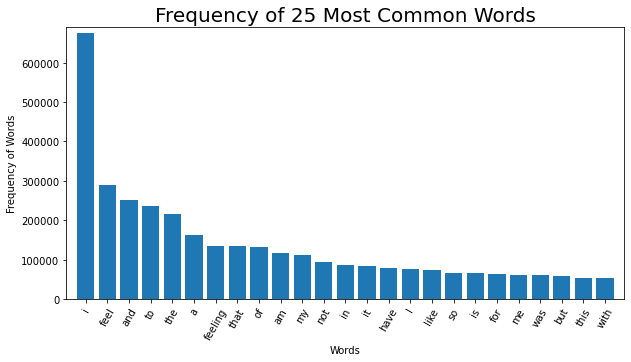

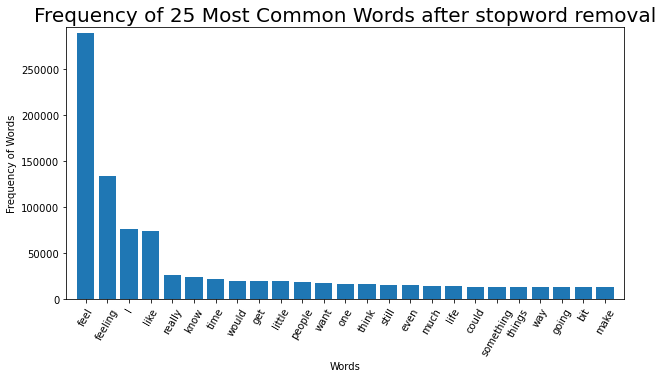

In [11]:
allwords=[]
words=dataset['text_tokenized']
for wordlist in words:
    allwords += wordlist

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()


stop_words = set(stopwords.words('english'))
dataset['stopwords_removed'] = dataset['text_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


allwords=[]
words=dataset['stopwords_removed']
for wordlist in words:
    allwords += wordlist

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title('Frequency of 25 Most Common Words after stopword removal', fontsize=20)
plt.show()

Looking closing at results above we can observe words in different form for eg., Feel and feeling. To resolve this, employing Lemmatization to switch words to their base root mode

In [12]:
#Lemmatizing the text: switching words to their base root mode.

lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

dataset['text_lemmatized'] = dataset['stopwords_removed'].apply(lemmatization)

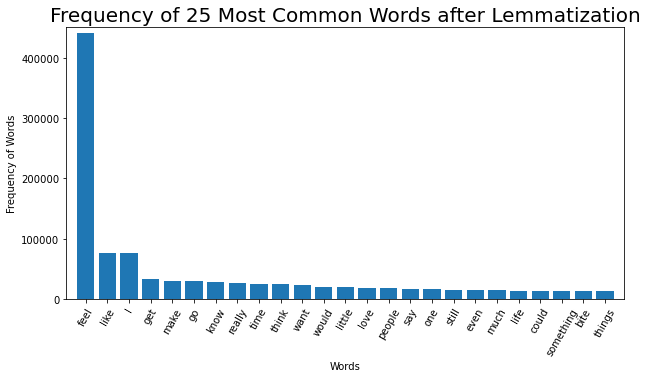

In [13]:
allwords=[]
words=dataset['text_lemmatized']
for wordlist in words:
    allwords += wordlist

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency of Words', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=60, fontsize=10)
plt.title('Frequency of 25 Most Common Words after Lemmatization', fontsize=20)
plt.show()

In [14]:
dataset['text_cleaned']=dataset['text_lemmatized'].str.join(' ')

In [15]:
dataset.head()

,text,emotions,no_contract,text_str,text_tokenized,stopwords_removed,text_lemmatized,text_cleaned
0,i feel awful about it too because it s my job ...,sadness,"[i, feel, awful, about, it, too, because, it, ...",i feel awful about it too because it s my job ...,"[i, feel, awful, about, it, too, because, it, ...","[feel, awful, job, get, position, succeed, hap...","[feel, awful, job, get, position, succeed, hap...",feel awful job get position succeed happen
1,im alone i feel awful,sadness,"[I am, alone, i, feel, awful]",I am alone i feel awful,"[I, am, alone, i, feel, awful]","[I, alone, feel, awful]","[I, alone, feel, awful]",I alone feel awful
2,ive probably mentioned this before but i reall...,joy,"[I have, probably, mentioned, this, before, bu...",I have probably mentioned this before but i re...,"[I, have, probably, mentioned, this, before, b...","[I, probably, mentioned, really, feel, proud, ...","[I, probably, mention, really, feel, proud, ac...",I probably mention really feel proud actually ...
3,i was feeling a little low few days back,sadness,"[i, was, feeling, a, little, low, few, days, b...",i was feeling a little low few days back,"[i, was, feeling, a, little, low, few, days, b...","[feeling, little, low, days, back]","[feel, little, low, days, back]",feel little low days back
4,i beleive that i am much more sensitive to oth...,love,"[i, beleive, that, i, am, much, more, sensitiv...",i beleive that i am much more sensitive to oth...,"[i, beleive, that, i, am, much, more, sensitiv...","[beleive, much, sensitive, peoples, feelings, ...","[beleive, much, sensitive, people, feel, tend,...",beleive much sensitive people feel tend compas...


In [16]:
final_df=dataset[['emotions','text_lemmatized', 'text_cleaned']]

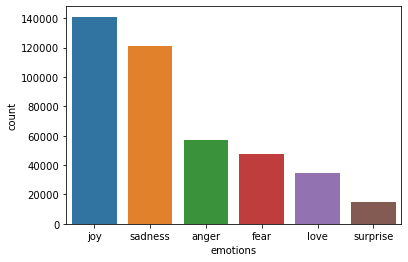

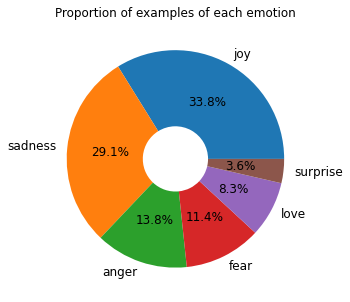

In [17]:
# Check the distribution of the emotions in the dataset
sns.countplot(x='emotions', data=final_df, order = final_df['emotions'].value_counts().index)
plt.show()

# Calculate the proportion of examples of each emotion
emotion_counts = final_df['emotions'].value_counts()
proportions = emotion_counts / emotion_counts.sum()

# Create a pie chart showing the proportion of examples of each emotion
plt.figure(figsize=(10,5), facecolor='white')
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%',  wedgeprops=dict(width=.7) ,textprops={'fontsize': 12})
plt.title('Proportion of examples of each emotion')
plt.show()

In [18]:
final_df

,emotions,text_lemmatized,text_cleaned
0,sadness,"[feel, awful, job, get, position, succeed, hap...",feel awful job get position succeed happen
1,sadness,"[I, alone, feel, awful]",I alone feel awful
2,joy,"[I, probably, mention, really, feel, proud, ac...",I probably mention really feel proud actually ...
3,sadness,"[feel, little, low, days, back]",feel little low days back
4,love,"[beleive, much, sensitive, people, feel, tend,...",beleive much sensitive people feel tend compas...
...,...,...,...
416804,joy,"[felt, finally, accept, bulgarian, conservator...",felt finally accept bulgarian conservatorie ap...
416805,fear,"[take, every, day, come, focus, eat, better, m...",take every day come focus eat better moment ai...
416806,sadness,"[suddenly, feel, everything, fake]",suddenly feel everything fake
416807,joy,"[I, feel, eager, ever, claw, back, go, pear, s...",I feel eager ever claw back go pear shape last...


In [19]:
# Calculate the length of the texts
final_df['text_length'] = final_df['text_cleaned'].apply(len)

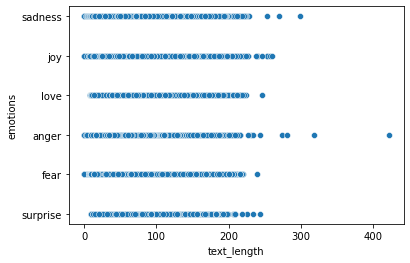

In [20]:
# Create a scatter plot showing the relationship between the text length and the emotion
sns.scatterplot(x='text_length', y='emotions', data=final_df)
plt.show()

In [21]:
# Calculate the mean and standard deviation of the text lengths
mean = np.mean(final_df['text_length'])
std = np.std(final_df['text_length'])
print(f'Mean: {mean:.2f}')
print(f'Standard deviation: {std:.2f}')


Mean: 56.88
Standard deviation: 33.11


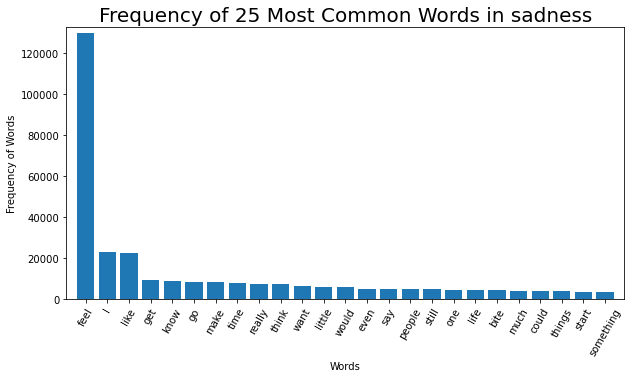

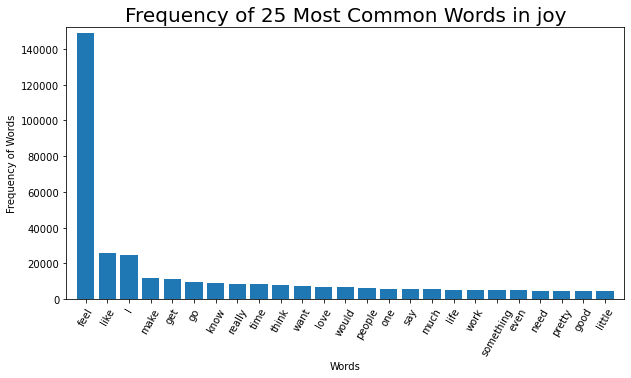

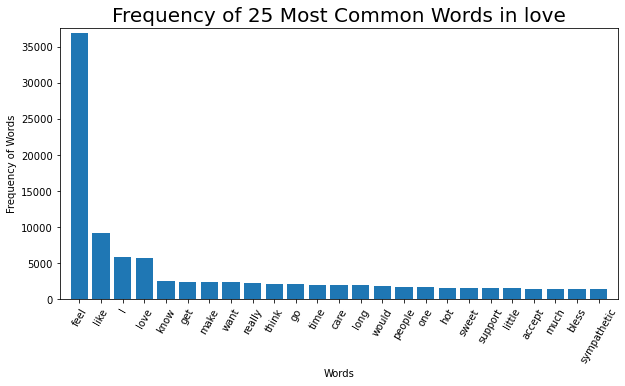

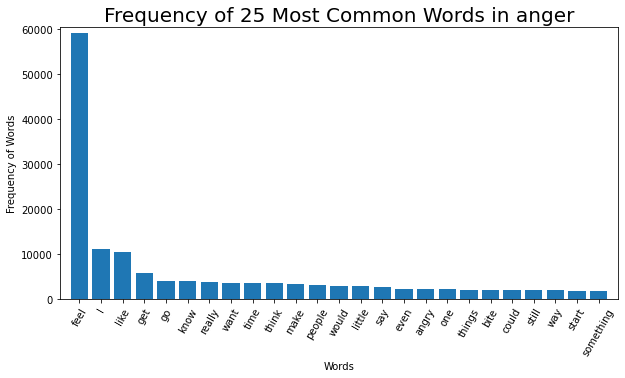

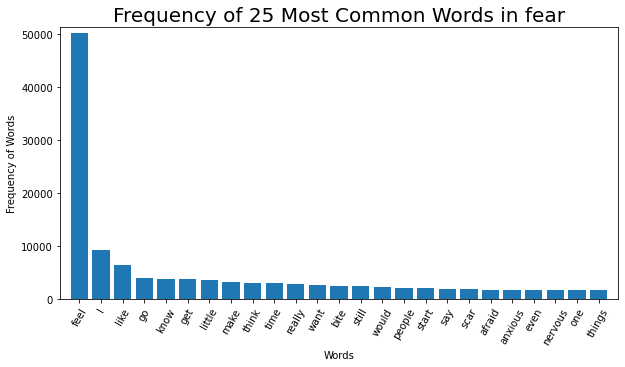

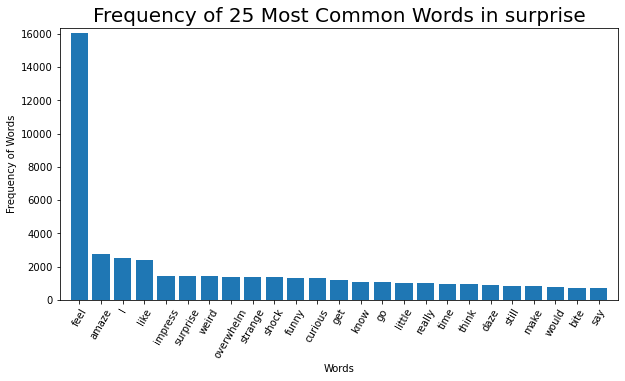

In [22]:
for emotion in emotions:
    allwords=[]
    words=final_df[final_df['emotions']==emotion]['text_lemmatized']
    for wordlist in words:
        allwords += wordlist


    mostcommon_small = FreqDist(allwords).most_common(25)
    x, y = zip(*mostcommon_small)
    plt.figure(figsize=(10,5))
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=10)
    plt.ylabel('Frequency of Words', fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks(rotation=60, fontsize=10)
    plt.title('Frequency of 25 Most Common Words in {}'.format(emotion), fontsize=20)
    plt.show()

Feel and Like are two word common to all the emotion categories. Removing them for further analysis

In [23]:
#nltk.download('stopwords')
stop_words = stopwords.words('english')


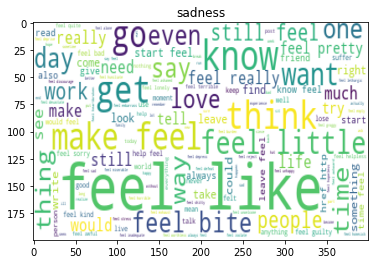

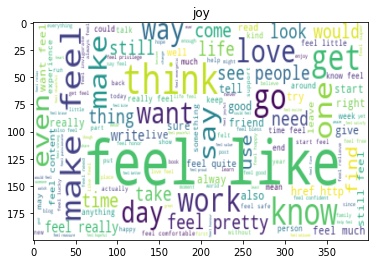

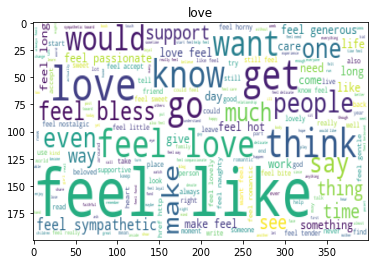

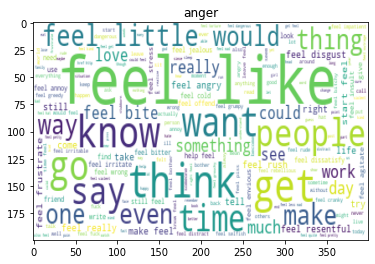

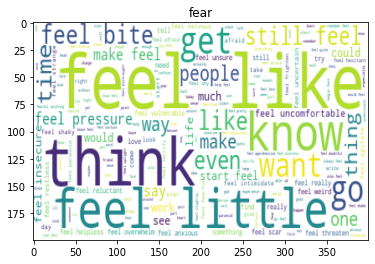

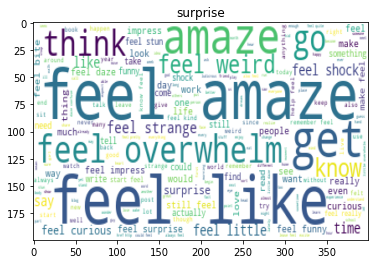

In [24]:
# Loop through the emotions
for emotion in emotions:
  # Create a word cloud for each emotion
  words = ' '.join(final_df[final_df['emotions'] == emotion]['text_cleaned'])
  wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(words)
  
  # Plot the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('auto')
  plt.title(emotion)
  plt.show()

Feel and Like are two word common to all the emotion categories. Removing them for further analysis

In [25]:
stop_words.append('feel')
stop_words.append('like')

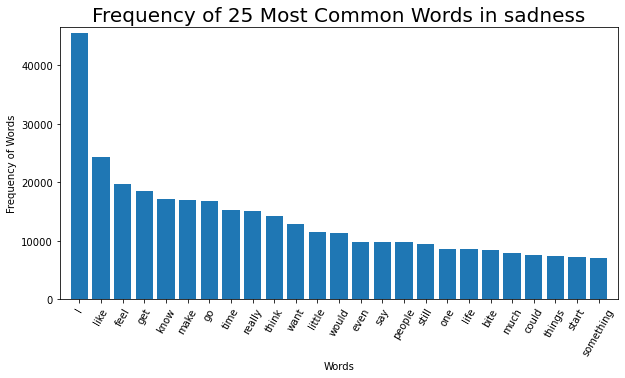

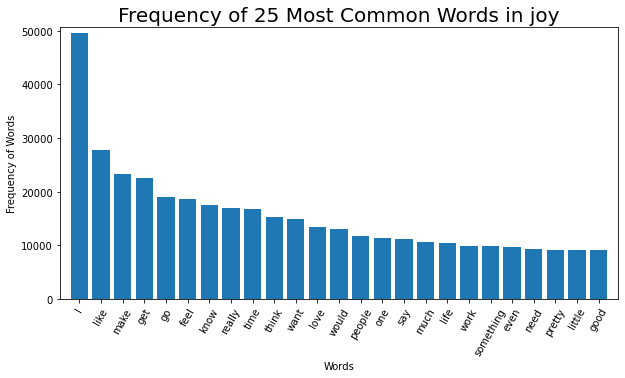

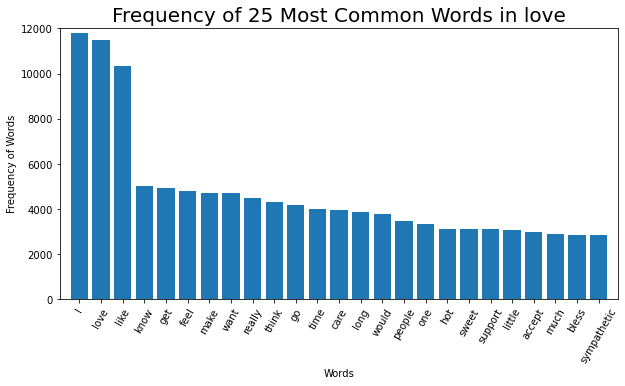

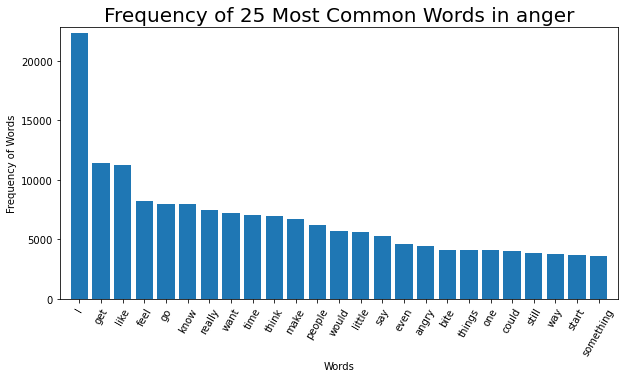

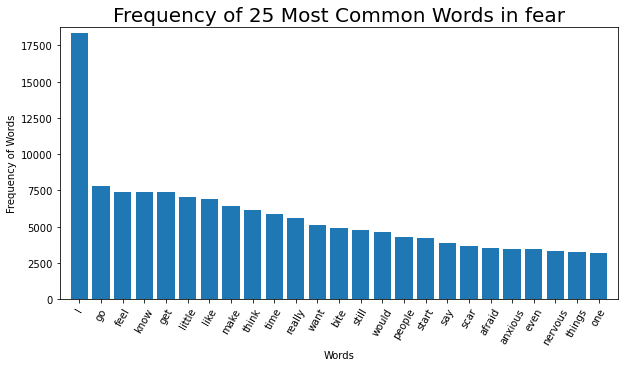

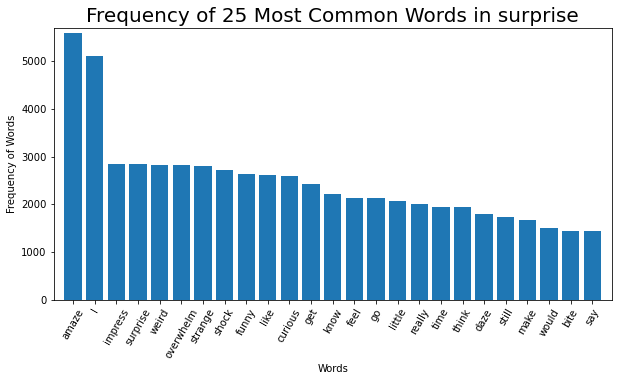

In [26]:
for emotion in emotions:
    allwords=[]
    words=final_df[final_df['emotions']==emotion]['text_lemmatized']
    for wordlist in words:
        if 'feel' in wordlist:
            wordlist.remove('feel')
            allwords += wordlist
        if 'like' in wordlist:
            wordlist.remove('like')
            allwords += wordlist
        else:
            allwords += wordlist


    mostcommon_small = FreqDist(allwords).most_common(25)
    x, y = zip(*mostcommon_small)
    plt.figure(figsize=(10,5))
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=10)
    plt.ylabel('Frequency of Words', fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks(rotation=60, fontsize=10)
    plt.title('Frequency of 25 Most Common Words in {}'.format(emotion), fontsize=20)
    plt.show()

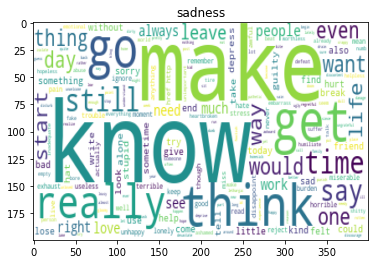

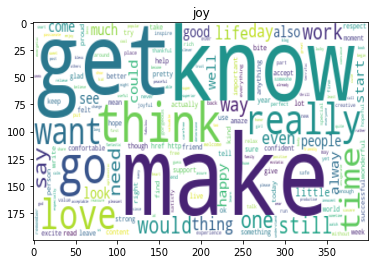

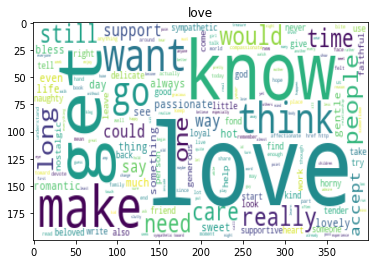

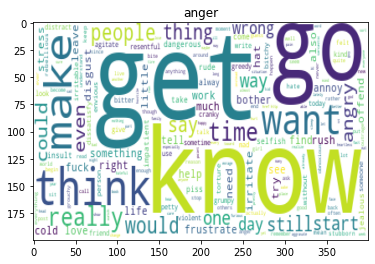

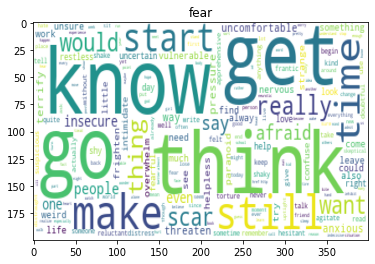

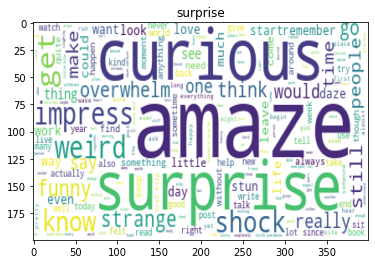

In [27]:
# Loop through the emotions
for emotion in emotions:
  # Create a word cloud for each emotion
  words = ' '.join(final_df[final_df['emotions'] == emotion]['text_cleaned'])
  wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(words)
  
  # Plot the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('auto')
  plt.title(emotion)
  plt.show()

# Conclusion
The dataset is unbalanced. 
    'Joy' label has 33.8% of the data 
    'Sadness' label has 29% of the data
    While other are less than 15%

The average length of the text is around 56 words.

The most frequently word used is 'feel'. This is consistent amongst every emotion label. The 2nd most frequently used word is 'like'. This is also consistent for 5 labels except 'surprise' where the 2nd most frequently used word is 'Amaze'

To create a model using this dataset, we need to generate or collect data to balance the classes, we can use Variational Autoencoders or Generative Adversarial Networks